<a href="https://colab.research.google.com/github/jkm2000korea/master_degree/blob/main/4%EC%A3%BC%EC%B0%A8_Regression_20240325.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/MyDrive/Colab Notebooks/데이터마이닝_2024/예제 데이터')
import pandas as pd
import numpy as np

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('regression_practice_.csv')
df1

,X1,X2,Y
0,6,9,56
1,1,5,25
2,4,4,30
3,4,1,18
4,8,4,42
5,4,6,38
6,6,1,24
7,3,3,23
8,5,4,33
9,8,9,62


In [ ]:
X_1 = df1['X1'].values
X_2 = df1['X2'].values
Y = df1['Y'].values

In [ ]:
n_samples = len(df1)
X = np.column_stack((np.ones(n_samples), X_1, X_2))   #np.ones(n_sample): n_sample 길이만큼 모든 원소가 1인 배열 생성
print(X)   #X 행렬 생성

[[1. 6. 9.]
 [1. 1. 5.]
 [1. 4. 4.]
 [1. 4. 1.]
 [1. 8. 4.]
 [1. 4. 6.]
 [1. 6. 1.]
 [1. 3. 3.]
 [1. 5. 4.]
 [1. 8. 9.]
 [1. 7. 2.]
 [1. 9. 4.]
 [1. 9. 4.]
 [1. 2. 4.]
 [1. 7. 8.]
 [1. 8. 1.]
 [1. 8. 2.]
 [1. 9. 1.]
 [1. 2. 5.]
 [1. 6. 8.]]


In [ ]:
X_transpose_X = np.dot(X.T, X)   #.dot: 두 배열의 점곱(행렬곱)을 계산하는 메소드
print(X_transpose_X)   #X^TX 행렬 생성

[[ 20. 116.  85.]
 [116. 796. 483.]
 [ 85. 483. 493.]]


In [ ]:
X_transpose_X_inv = np.linalg.inv(X_transpose_X)   #linalg: linear algebra 선형대수, .inv(): inverse 역행렬, 본 코드는 역행렬이 존재하지 않는 경우 에러 발생
print(X_transpose_X_inv)   #X^TX의 역행렬 생성

[[ 0.49325237 -0.05000434 -0.03605346]
 [-0.05000434  0.0081672   0.0006199 ]
 [-0.03605346  0.0006199   0.00763718]]


In [ ]:
X_transpose_Y = np.dot(X.T, Y)
print(X_transpose_Y)   #X^Ty 계산

[ 728. 4552. 3591.]


In [ ]:
coefficients = np.dot(X_transpose_X_inv, X_transpose_Y)
print("회귀 계수:", coefficients)

회귀 계수: [2. 3. 4.]


In [ ]:
from sklearn.linear_model import LinearRegression

X = df1[['X1', 'X2']].values   #독립변수
y = df1['Y'].values   #종속변수

# 선형 회귀 모델 생성 및 피팅
model = LinearRegression()
model.fit(X, y)

# 회귀 계수 및 절편 출력
intercept = model.intercept_   #절편 (beta_0)
coefficients = model.coef_   #기울기 (beta_1, beta_2)


print("절편:", intercept)
print("X1, X2 계수:", coefficients)

절편: 1.999999999999993
X1, X2 계수: [3. 4.]


In [ ]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

car = pd.read_csv("ToyotaCorolla_refined.csv")
car

,Price,Age_08_04,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Quarterly_Tax,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,210,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,210,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,210,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,210,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
995,9950,68,42750,Petrol,110,1,0,1600,3,69,1050
996,9950,67,42102,Petrol,110,1,0,1600,5,85,1075
997,9950,63,41586,Petrol,110,1,0,1600,5,19,1114
998,9900,64,41200,Petrol,110,0,0,1600,5,85,1070


In [ ]:
X = car.iloc[:, 1:]

X = pd.get_dummies(X, drop_first=True)   #Fuel_Type의 3개 범주 Petrol, Diesel, CNG에 대해 더미변수를 생성하여 구분시켜줌, drop_first=True 는 첫 번째 범주는 더미변수에서 제외한다는 의미
X

,Age_08_04,KM,HP,Met_Color,Automatic,cc,Doors,Quarterly_Tax,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,1,0,2000,3,210,1165,1,0
1,23,72937,90,1,0,2000,3,210,1165,1,0
2,24,41711,90,1,0,2000,3,210,1165,1,0
3,26,48000,90,0,0,2000,3,210,1165,1,0
4,30,38500,90,0,0,2000,3,210,1170,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,68,42750,110,1,0,1600,3,69,1050,0,1
996,67,42102,110,1,0,1600,5,85,1075,0,1
997,63,41586,110,1,0,1600,5,19,1114,0,1
998,64,41200,110,0,0,1600,5,85,1070,0,1


In [ ]:
y = car.iloc[:, 0]

train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.4, random_state=1)

X = sm.add_constant(train_X)   #상수항 추가

model = sm.OLS(train_y, X).fit()

In [ ]:
print(model.params)   #절편과 각 독립변수의 계수

const              -1319.354380
Age_08_04           -140.748761
KM                    -0.017840
HP                    36.103419
Met_Color             84.281830
Automatic            416.781954
cc                     0.017737
Doors                -50.657863
Quarterly_Tax         13.625325
Weight                13.038711
Fuel_Type_Diesel    1066.464681
Fuel_Type_Petrol    2310.249543
dtype: float64


In [ ]:
predictions = model.predict(sm.add_constant(valid_X))   #검증할 X에 대해 상수항을 더하고 예측값 계산

residuals = valid_y - predictions   #잔차 계산

#결과를 DataFrame으로 만들기
results_df = pd.DataFrame({
    'Predicted': predictions,
    'Actual': valid_y,
    'Residual': residuals
})

print(results_df.head())


        Predicted  Actual     Residual
507  10607.333940   11500   892.666060
818   9272.705792    8950  -322.705792
452  10617.947808   11450   832.052192
368  13600.396275   11450 -2150.396275
242  12396.694660   11950  -446.694660


In [ ]:
#실제 값과 예측값 사이의 오차 계산
errors = valid_y - predictions

#ME (Mean Error)
me = np.mean(errors)

#MSE (Mean Squared Error)
mse = np.mean(errors ** 2)

#RMSE (Root Mean Squared Error)
rmse = np.sqrt(mse)

#MAE (Mean Absolute Error)
mae = np.mean(np.abs(errors))

#MPE (Mean Percentage Error)
mpe = np.mean((errors / valid_y) * 100)

#MAPE (Mean Absolute Percentage Error)
mape = np.mean(np.abs(errors / valid_y) * 100)

print(f"ME: {me},\n MSE: {mse},\n RMSE: {rmse},\n MAE: {mae},\n MPE: {mpe},\n MAPE: {mape}")


ME: 103.68029668245197,
 MSE: 1723581.0830515444,
 RMSE: 1312.8522700789852,
 MAE: 1017.5971544786133,
 MPE: -0.26330560138892684,
 MAPE: 9.011120428539861


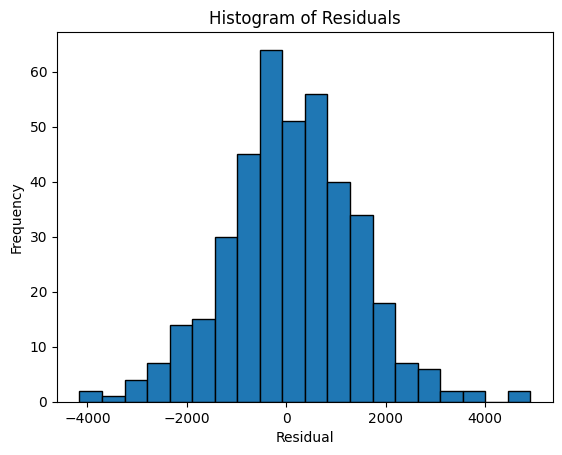

In [ ]:
import matplotlib.pyplot as plt

# errors 변수에 대한 히스토그램 그리기
plt.hist(errors, bins=20, edgecolor='k')   #edgecolor='k': 바의 테두리를 검은색으로 설정
plt.title('Histogram of Residuals')
plt.xlabel('Residual')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#### Exhaustive Search

In [ ]:
car = pd.read_csv("ToyotaCorolla_refined.csv")
car

,Price,Age_08_04,KM,Fuel_Type,HP,Met_Color,Automatic,cc,Doors,Quarterly_Tax,Weight
0,13500,23,46986,Diesel,90,1,0,2000,3,210,1165
1,13750,23,72937,Diesel,90,1,0,2000,3,210,1165
2,13950,24,41711,Diesel,90,1,0,2000,3,210,1165
3,14950,26,48000,Diesel,90,0,0,2000,3,210,1165
4,13750,30,38500,Diesel,90,0,0,2000,3,210,1170
...,...,...,...,...,...,...,...,...,...,...,...
995,9950,68,42750,Petrol,110,1,0,1600,3,69,1050
996,9950,67,42102,Petrol,110,1,0,1600,5,85,1075
997,9950,63,41586,Petrol,110,1,0,1600,5,19,1114
998,9900,64,41200,Petrol,110,0,0,1600,5,85,1070


In [ ]:
pip install dmba

In [ ]:
from dmba import adjusted_r2_score, AIC_score, BIC_score, exhaustive_search

X = car.iloc[:, 1:]
X = pd.get_dummies(X, drop_first=True)   #Fuel_Type의 3개 범주 Petrol, Diesel, CNG에 대해 더미변수를 생성하여 구분시켜줌, drop_first=True 는 첫 번째 범주는 더미변수에서 제외한다는 의미

y = car.iloc[:, 0]

train_X, valid_X, train_y, valid_y = train_test_split(X,y,test_size=0.4, random_state=1)

In [ ]:
def train_model(variables):   #variables: 모델을 학습시키는 데 사용되는 독립변수 목록(독립변수 하나씩(조합씩) 입력)
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model   #(1)선형회귀모델 생성, (2) 주어진 variables를 사용하여 train_X에서 모델을 훈련(fit), (3) 훈련된 선형회귀 모델 반환

def score_model(model, variables):   #model: 평가할 선형 회귀 모델 / variables: 모델을 평가하는 데 사용된 독립변수의 목록
    pred_y = model.predict(train_X[variables])   #train_X의 variables에 대해 예측을 수행
    return -adjusted_r2_score(train_y, pred_y, model)   #예측을 바탕으로 조정된 R^2값을 계산, 점수가 음수로 반환되기 때문에 -처리

allvariables = train_X.columns
results = exhaustive_search(allvariables, train_model, score_model)   #exhaustive_search: 모든 가능한 변수 조합에 대해 모델 훈련 및 최적의 변수 조합 탐색
#allvariables: 가능한 모든 독립변수의 목록

data = []
for result in results:   #results 리스트를 돌아가며 각 결과에 대해 AIC와 BIC 점수를 계산
  model = result['model']   #results 내 각각의 리스트를 result로 받고, 그 안에 들어있는 exhaustive_search 결과 n, variables, score, model을 불러오는 것. 여기서는 결과 중 model 키 값을 불러와서 model 변수에 저장
  variables = list(result['variables'])   #여기서는 variables 키 값을 불러와서 variables에 저장
  AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
  BIC = BIC_score(train_y, model.predict(train_X[variables]), model)
  d = {'n': result['n'], 'r2adj': -result['score'], 'AIC': AIC, 'BIC': BIC}
  d.update({var: var in result['variables'] for var in allvariables})   #allvariables에 있는 변수에 대해 현재 모델의 변수 목록('result['variables']')안에 있는지 여부를 딕셔너리로 만들고, 그것을 d에 추가
  data.append(d)

pd.DataFrame(data, columns = ('n', 'r2adj', 'AIC', 'BIC') + tuple(sorted(allvariables)))   #allvariables 리스트의 모든 항목을 알파벳순으로 정렬 + ('n', 'r2adj', 'AIC', 'BIC')라는 튜플(고정된 열 이름)에 변수를 붙이기 위해 동일하게 튜플 정의


,n,r2adj,AIC,BIC,Age_08_04,Automatic,Doors,Fuel_Type_Diesel,Fuel_Type_Petrol,HP,KM,Met_Color,Quarterly_Tax,Weight,cc
0,1,0.767901,10689.712094,10702.902883,True,False,False,False,False,False,False,False,False,False,False
1,2,0.801160,10597.910645,10615.498364,True,False,False,False,False,True,False,False,False,False,False
2,3,0.829659,10506.084235,10528.068884,True,False,False,False,False,True,False,False,False,True,False
3,4,0.846357,10445.174820,10471.556397,True,False,False,False,False,True,True,False,False,True,False
4,5,0.849044,10435.578836,10466.357344,True,False,False,False,False,True,True,False,True,True,False
5,6,0.853172,10419.932278,10455.107715,True,False,False,False,True,True,True,False,True,True,False
6,7,0.853860,10418.104025,10457.676392,True,False,False,True,True,True,True,False,True,True,False
7,8,0.854297,10417.290103,10461.259399,True,True,False,True,True,True,True,False,True,True,False
8,9,0.854172,10418.789079,10467.155305,True,True,True,True,True,True,True,False,True,True,False
9,10,0.854036,10420.330800,10473.093956,True,True,True,True,True,True,True,True,True,True,False


In [ ]:
results

[{'n': 1,
  'variables': ['Age_08_04'],
  'score': -0.7679012055663247,
  'model': LinearRegression()},
 {'n': 2,
  'variables': ['Age_08_04', 'HP'],
  'score': -0.801159894775247,
  'model': LinearRegression()},
 {'n': 3,
  'variables': ['Age_08_04', 'HP', 'Weight'],
  'score': -0.8296593751851307,
  'model': LinearRegression()},
 {'n': 4,
  'variables': ['Age_08_04', 'KM', 'HP', 'Weight'],
  'score': -0.8463572130654309,
  'model': LinearRegression()},
 {'n': 5,
  'variables': ['Age_08_04', 'KM', 'HP', 'Quarterly_Tax', 'Weight'],
  'score': -0.8490443945677377,
  'model': LinearRegression()},
 {'n': 6,
  'variables': ['Age_08_04',
   'KM',
   'HP',
   'Quarterly_Tax',
   'Weight',
   'Fuel_Type_Petrol'],
  'score': -0.8531723015240328,
  'model': LinearRegression()},
 {'n': 7,
  'variables': ['Age_08_04',
   'KM',
   'HP',
   'Quarterly_Tax',
   'Weight',
   'Fuel_Type_Diesel',
   'Fuel_Type_Petrol'],
  'score': -0.8538596994982728,
  'model': LinearRegression()},
 {'n': 8,
  'variab

In [ ]:
from dmba import forward_selection
from dmba import regressionSummary

def train_model(variables):
  if len(variables)==0:
    return None   #독립변수가 0개일 때 임시 처리
  model = LinearRegression()
  model.fit(train_X[variables], train_y)
  return model

def score_model(model, variables):
  if len(variables)==0:
    return float('inf')   #독립변수가 0개일 때 임시 처리
  return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)   #verbose=True: 함수의 진행 상황을 출력

print(best_variables)

regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: Age_08_04, KM, HP, Met_Color, Automatic, cc, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=inf, constant
Step: score=10689.71, add Age_08_04
Step: score=10597.91, add HP
Step: score=10506.08, add Weight
Step: score=10445.17, add KM
Step: score=10435.58, add Quarterly_Tax
Step: score=10419.93, add Fuel_Type_Petrol
Step: score=10418.10, add Fuel_Type_Diesel
Step: score=10417.29, add Automatic
Step: score=10417.29, add None
['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']

Regression statistics

                      Mean Error (ME) : 103.3045
       Root Mean Squared Error (RMSE) : 1314.4844
            Mean Absolute Error (MAE) : 1016.8875
          Mean Percentage Error (MPE) : -0.2700
Mean Absolute Percentage Error (MAPE) : 8.9984


In [ ]:
from dmba import backward_elimination

def train_model(variables):
  model = LinearRegression()
  model.fit(train_X[variables], train_y)
  return model

def score_model(model, variables):
  return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = backward_elimination(allvariables, train_model, score_model, verbose=True)   #verbose=True: 함수의 진행 상황을 출력

print(best_variables)

regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: Age_08_04, KM, HP, Met_Color, Automatic, cc, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=10422.30
Step: score=10420.33, remove cc
Step: score=10418.79, remove Met_Color
Step: score=10417.29, remove Doors
Step: score=10417.29, remove None
['Age_08_04', 'KM', 'HP', 'Automatic', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']

Regression statistics

                      Mean Error (ME) : 103.3045
       Root Mean Squared Error (RMSE) : 1314.4844
            Mean Absolute Error (MAE) : 1016.8875
          Mean Percentage Error (MPE) : -0.2700
Mean Absolute Percentage Error (MAPE) : 8.9984


In [ ]:
from dmba import stepwise_selection

def train_model(variables):
  if len(variables)==0:
    return None   #독립변수가 0개일 때 임시 처리
  model = LinearRegression()
  model.fit(train_X[variables], train_y)
  return model

def score_model(model, variables):
  if len(variables)==0:
    return float('inf')   #독립변수가 0개일 때 임시 처리
  return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model, verbose=True)   #verbose=True: 함수의 진행 상황을 출력

print(best_variables)

regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: Age_08_04, KM, HP, Met_Color, Automatic, cc, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=inf, constant
Step: score=10689.71, add Age_08_04
Step: score=10597.91, add HP
Step: score=10506.08, add Weight
Step: score=10445.17, add KM
Step: score=10435.58, add Quarterly_Tax
Step: score=10419.93, add Fuel_Type_Petrol
Step: score=10418.10, add Fuel_Type_Diesel
Step: score=10417.29, add Automatic
Step: score=10417.29, unchanged None
['Age_08_04', 'HP', 'Weight', 'KM', 'Quarterly_Tax', 'Fuel_Type_Petrol', 'Fuel_Type_Diesel', 'Automatic']

Regression statistics

                      Mean Error (ME) : 103.3045
       Root Mean Squared Error (RMSE) : 1314.4844
            Mean Absolute Error (MAE) : 1016.8875
          Mean Percentage Error (MPE) : -0.2700
Mean Absolute Percentage Error (MAPE) : 8.9984
